# Data Cleaning & Exploration


Keywords to know:

LI - Low Income
LA - Low Access

Data Dictionaries can be found under `datasets/original_data_files` in the second sheets of the original Excel files. 

More information on data decisions can be found in `datasets/original_data_files/FoodAccessResearchAtlasDocumentation2010.pdf`

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
data_2019 = pd.read_csv('datasets/2019.csv', index_col=0)

In [3]:
data_2010 = pd.read_csv('datasets/2010.csv', index_col=0)

The 2019 dataset has 147 columns. The 2010 dataset has 65 columns. 

In [4]:
data_2019.columns = data_2019.columns.str.lower()

In [5]:
data_2019.head()

,censustract,state,county,urban,pop2010,ohu2010,groupquartersflag,numgqtrs,pctgqtrs,lilatracts_1and10,...,tractseniors,tractwhite,tractblack,tractasian,tractnhopi,tractaian,tractomultir,tracthispanic,tracthunv,tractsnap
0,1001020100,Alabama,Autauga County,1,1912,693,0,0.0,0.000000,0,...,221.0,1622.0,217.0,14.0,0.0,14.0,45.0,44.0,6.0,102.0
1,1001020200,Alabama,Autauga County,1,2170,743,0,181.0,8.341014,1,...,214.0,888.0,1217.0,5.0,0.0,5.0,55.0,75.0,89.0,156.0
2,1001020300,Alabama,Autauga County,1,3373,1256,0,0.0,0.000000,0,...,439.0,2576.0,647.0,17.0,5.0,11.0,117.0,87.0,99.0,172.0
3,1001020400,Alabama,Autauga County,1,4386,1722,0,0.0,0.000000,0,...,904.0,4086.0,193.0,18.0,4.0,11.0,74.0,85.0,21.0,98.0
4,1001020500,Alabama,Autauga County,1,10766,4082,0,181.0,1.681219,0,...,1126.0,8666.0,1437.0,296.0,9.0,48.0,310.0,355.0,230.0,339.0


In [6]:
data_2010.columns = data_2010.columns.str.lower()

In [7]:
data_2010.head()

,censustract,state,county,lilatracts_1and10,lilatracts_halfand10,lilatracts_1and20,lilatracts_vehicle,urban,rural,la1and10,...,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lahunv20,lahunv20share
0,1001020100,AL,Autauga,0,0,0,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1001020200,AL,Autauga,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1001020300,AL,Autauga,0,0,0,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1001020400,AL,Autauga,0,0,0,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1001020500,AL,Autauga,0,0,0,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
data_2010.columns

Index(['censustract', 'state', 'county', 'lilatracts_1and10',
       'lilatracts_halfand10', 'lilatracts_1and20', 'lilatracts_vehicle',
       'urban', 'rural', 'la1and10', 'lahalfand10', 'la1and20',
       'latracts_half', 'latracts1', 'latracts10', 'latracts20',
       'latractsvehicle_20', 'hunvflag', 'groupquartersflag', 'ohu2010',
       'numgqtrs', 'pctgqtrs', 'lowincometracts', 'pop2010', 'uatyp10',
       'lapophalf', 'lapophalfshare', 'lalowihalf', 'lalowihalfshare',
       'lakidshalf', 'lakidshalfshare', 'laseniorshalf', 'laseniorshalfshare',
       'lahunvhalf', 'lahunvhalfshare', 'lapop1', 'lapop1share', 'lalowi1',
       'lalowi1share', 'lakids1', 'lakids1share', 'laseniors1',
       'laseniors1share', 'lahunv1', 'lahunv1share', 'lapop10', 'lapop10share',
       'lalowi10', 'lalowi10share', 'lakids10', 'lakids10share', 'laseniors10',
       'laseniors10share', 'lahunv10', 'lahunv10share', 'lapop20',
       'lapop20share', 'lalowi20', 'lalowi20share', 'lakids20',
       'l

In [9]:
data_2010.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72864 entries, 0 to 72863
Data columns (total 65 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   censustract           72864 non-null  int64  
 1   state                 72864 non-null  object 
 2   county                72864 non-null  object 
 3   lilatracts_1and10     72864 non-null  int64  
 4   lilatracts_halfand10  72864 non-null  int64  
 5   lilatracts_1and20     72864 non-null  int64  
 6   lilatracts_vehicle    72864 non-null  int64  
 7   urban                 72864 non-null  int64  
 8   rural                 72864 non-null  int64  
 9   la1and10              72864 non-null  int64  
 10  lahalfand10           72864 non-null  int64  
 11  la1and20              72864 non-null  int64  
 12  latracts_half         72864 non-null  int64  
 13  latracts1             72864 non-null  int64  
 14  latracts10            72864 non-null  int64  
 15  latracts20         

In [10]:
set(data_2010.columns) - set(data_2019.columns)

{'rural', 'uatyp10'}

In [11]:
# difference between 2019 columns and 2010 columns
set(data_2019.columns) - set(data_2010.columns)

{'laaian1',
 'laaian10',
 'laaian10share',
 'laaian1share',
 'laaian20',
 'laaian20share',
 'laaianhalf',
 'laaianhalfshare',
 'laasian1',
 'laasian10',
 'laasian10share',
 'laasian1share',
 'laasian20',
 'laasian20share',
 'laasianhalf',
 'laasianhalfshare',
 'lablack1',
 'lablack10',
 'lablack10share',
 'lablack1share',
 'lablack20',
 'lablack20share',
 'lablackhalf',
 'lablackhalfshare',
 'lahisp1',
 'lahisp10',
 'lahisp10share',
 'lahisp1share',
 'lahisp20',
 'lahisp20share',
 'lahisphalf',
 'lahisphalfshare',
 'lalowi05_10',
 'lalowi1_10',
 'lalowi1_20',
 'lanhopi1',
 'lanhopi10',
 'lanhopi10share',
 'lanhopi1share',
 'lanhopi20',
 'lanhopi20share',
 'lanhopihalf',
 'lanhopihalfshare',
 'laomultir1',
 'laomultir10',
 'laomultir10share',
 'laomultir1share',
 'laomultir20',
 'laomultir20share',
 'laomultirhalf',
 'laomultirhalfshare',
 'lapop05_10',
 'lapop1_10',
 'lapop1_20',
 'lasnap1',
 'lasnap10',
 'lasnap10share',
 'lasnap1share',
 'lasnap20',
 'lasnap20share',
 'lasnaphalf',
 

In [12]:
(data_2019['tractsnap']/data_2019['pop2010']).sort_values().tail(20)

34715    0.441612
58325    0.458488
23867    0.463546
55762    0.469206
34914    0.493192
44654    0.503106
21335    0.525490
34871    0.548813
50570    0.737500
43291    0.923077
21331    1.236504
42964    1.250000
43276    1.871795
754      2.203883
35199    2.250000
15231    2.335714
1293          NaN
59643         NaN
59644         NaN
59645         NaN
dtype: float64

In [13]:
data_2019.loc[[21331]]

,censustract,state,county,urban,pop2010,ohu2010,groupquartersflag,numgqtrs,pctgqtrs,lilatracts_1and10,...,tractseniors,tractwhite,tractblack,tractasian,tractnhopi,tractaian,tractomultir,tracthispanic,tracthunv,tractsnap
21331,17031350400,Illinois,Cook County,1,389,150,0,0.0,0.0,0,...,25.0,0.0,377.0,0.0,0.0,8.0,4.0,12.0,487.0,481.0


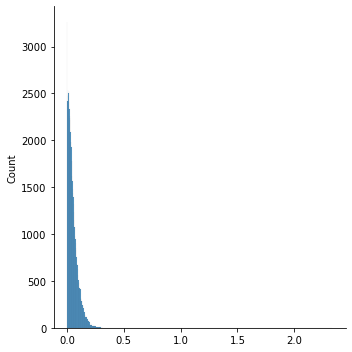

In [14]:
sns.displot(data_2019['tractsnap']/data_2019['pop2010'])

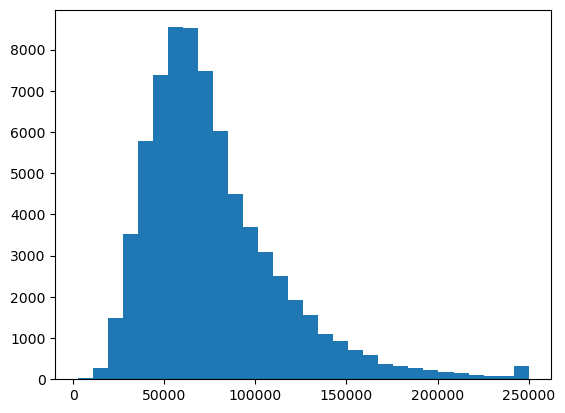

In [15]:
plt.hist(data_2019['medianfamilyincome'], bins=30);

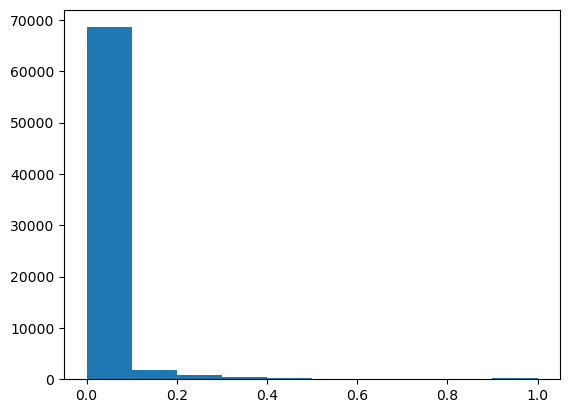

In [16]:
plt.hist(data_2010['pctgqtrs']);

In [17]:
data_2010['lowincometracts'].value_counts(normalize=True)

0    0.598087
1    0.401913
Name: lowincometracts, dtype: float64

In [18]:
pd.set_option('display.max_columns', None)

In [19]:
data_2019[~data_2019['medianfamilyincome'].isnull()].sort_values('pop2010', ascending=False).head(2)

,censustract,state,county,urban,pop2010,ohu2010,groupquartersflag,numgqtrs,pctgqtrs,lilatracts_1and10,lilatracts_halfand10,lilatracts_1and20,lilatracts_vehicle,hunvflag,lowincometracts,povertyrate,medianfamilyincome,la1and10,lahalfand10,la1and20,latracts_half,latracts1,latracts10,latracts20,latractsvehicle_20,lapop1_10,lapop05_10,lapop1_20,lalowi1_10,lalowi05_10,lalowi1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,lawhitehalfshare,lablackhalf,lablackhalfshare,laasianhalf,laasianhalfshare,lanhopihalf,lanhopihalfshare,laaianhalf,laaianhalfshare,laomultirhalf,laomultirhalfshare,lahisphalf,lahisphalfshare,lahunvhalf,lahunvhalfshare,lasnaphalf,lasnaphalfshare,lapop1,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lawhite1,lawhite1share,lablack1,lablack1share,laasian1,laasian1share,lanhopi1,lanhopi1share,laaian1,laaian1share,laomultir1,laomultir1share,lahisp1,lahisp1share,lahunv1,lahunv1share,lasnap1,lasnap1share,lapop10,lapop10share,lalowi10,lalowi10share,lakids10,lakids10share,laseniors10,laseniors10share,lawhite10,lawhite10share,lablack10,lablack10share,laasian10,laasian10share,lanhopi10,lanhopi10share,laaian10,laaian10share,laomultir10,laomultir10share,lahisp10,lahisp10share,lahunv10,lahunv10share,lasnap10,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,tractlowi,tractkids,tractseniors,tractwhite,tractblack,tractasian,tractnhopi,tractaian,tractomultir,tracthispanic,tracthunv,tractsnap
9692,6073018700,California,San Diego County,0,37452,6016,0,16575.0,44.256649,0,0,0,0,0,1,6.740714,41996.0,0,0,0,0,0,0,0,0,1.295641,1.295641,NaN,0.678117,0.678117,NaN,37451.999861,100.000000,19601.754924,52.338340,9083.999940,24.255046,29.000000,0.077432,28477.000102,76.035993,2936.000004,7.839368,1082.000008,2.889031,311.000000,0.830396,510.999999,1.364413,4134.999997,11.040799,8192.000008,21.873331,0.00000,0.000000,222.199214,3.693471,37060.980422,98.955945,19397.101842,51.791899,8906.946313,23.782298,27.954446,0.074641,28164.983981,75.202884,2917.226439,7.789241,1071.707360,2.861549,310.681123,0.829545,505.421283,1.349517,4090.960486,10.923210,8103.448153,21.636890,0.000000,0.000000,218.115562,3.625591,1.295641,0.003459,0.678117,0.001811,0.0,0.0,0.0,0.0,0.971731,0.002595,0.32391,0.000865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.161955,0.000432,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11639.0,9084.0,29.0,28477.0,2936.0,1082.0,311.0,511.0,4135.0,8192.0,0.0,254.0
63202,48157673101,Texas,Fort Bend County,1,33201,10124,0,188.0,0.566248,0,0,0,0,1,0,3.091519,156440.0,1,1,1,1,1,0,0,1,4851.071193,20984.713946,4851.071193,327.615893,1557.504505,327.615893,20984.713946,63.205066,1557.504505,4.691137,7410.393049,22.319789,963.957665,2.903399,15594.437828,46.969784,1405.866624,4.234410,2661.261514,8.015607,15.822998,0.047658,81.941461,0.246804,1225.383553,3.690803,3731.254954,11.238381,101.05787,0.998201,79.804320,0.788269,4851.071193,14.611220,327.615893,0.986765,1697.944571,5.114137,230.986471,0.695721,3631.096045,10.936707,349.540396,1.052801,571.518901,1.721391,3.974466,0.011971,19.644219,0.059168,275.297187,0.829183,747.605421,2.251756,33.533499,0.331228,18.085398,0.178639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5606.0,11845.0,1604.0,24291.0,2361.0,4370.0,19.0,128.0,2032.0,6380.0,219.0,245.0


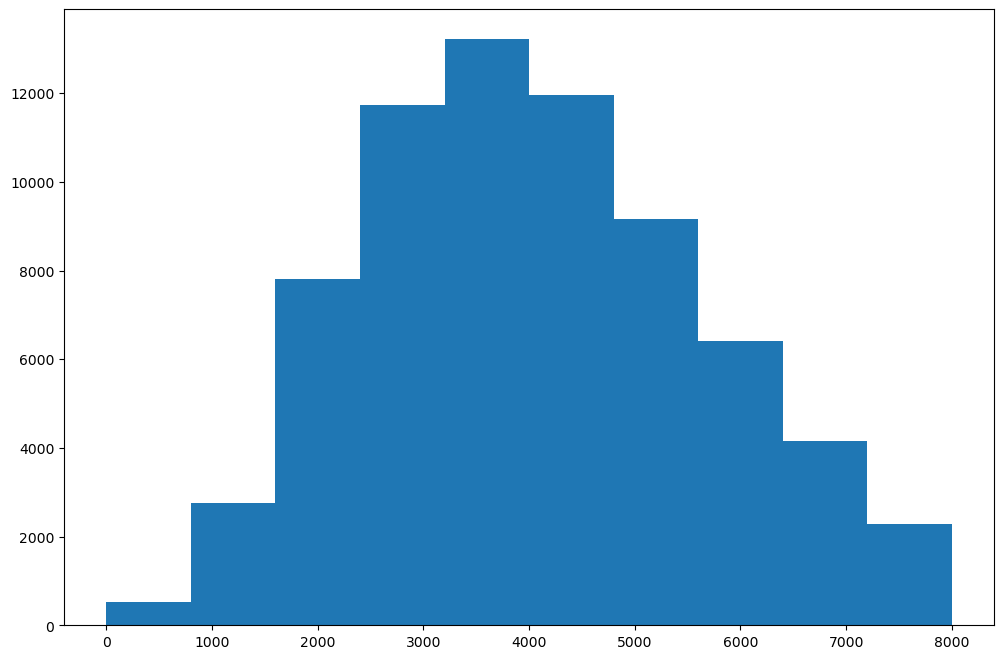

In [20]:
plt.figure(figsize=(12,8))
plt.hist(data_2019[data_2019['pop2010'] <= 8000]['pop2010']);

----

### Map zip to census_tract

In [21]:
# %pip install openpyxl

In [22]:
zip_2010 = pd.read_excel('datasets/zip_tracts/ZIP_TRACT_032010.xlsx', dtype='category')

/Users/derryzrli/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/pandas/io/parsers/base_parser.py:761: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cats = Index(values).unique().dropna()
/Users/derryzrli/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/pandas/io/parsers/base_parser.py:761: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cats = Index(values).unique().dropna()
/Users/derryzrli/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/pandas/io/parsers/base_parser.py:761: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cats = Index(values).unique().dropna()
/Users/derryzrli/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/pandas/io/parsers/base_pa

In [23]:
zip_2019 = pd.read_excel('datasets/zip_tracts/ZIP_TRACT_032019.xlsx', dtype='category')

/Users/derryzrli/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/pandas/io/parsers/base_parser.py:761: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cats = Index(values).unique().dropna()
/Users/derryzrli/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/pandas/io/parsers/base_parser.py:761: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cats = Index(values).unique().dropna()
/Users/derryzrli/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/pandas/io/parsers/base_parser.py:761: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cats = Index(values).unique().dropna()
/Users/derryzrli/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/pandas/io/parsers/base_pa

In [24]:
zip_2010.columns = zip_2010.columns.str.lower()

In [25]:
zip_2010.head()

,zip,tract,res_ratio,bus_ratio,oth_ratio,tot_ratio
0,00501,36103158607,0.000000,1.000000,0.000000,1.000000
1,00544,36103158607,0.000000,1.000000,0.000000,1.000000
2,00601,72001956300,0.004316,0.005063,0.000000,0.004310
3,00601,72001956600,0.728760,0.448101,0.546667,0.703202
4,00601,72001956700,0.266924,0.546835,0.453333,0.292488


In [26]:
zip_2010[['res_ratio', 'bus_ratio','oth_ratio', 'tot_ratio']] = zip_2010[['res_ratio', 'bus_ratio','oth_ratio', 'tot_ratio']].astype(np.float64)

In [27]:
zip_2010.dtypes

zip          category
tract        category
res_ratio     float64
bus_ratio     float64
oth_ratio     float64
tot_ratio     float64
dtype: object

In [28]:
zip_2019.head()

,zip,tract,res_ratio,bus_ratio,oth_ratio,tot_ratio
0,00601,72001956600,0.167449,0.366569,0.412281,0.183442
1,00601,72001956300,0.005238,0.005865,0.008772,0.005341
2,00601,72113071700,0.192738,0.202346,0.131579,0.192122
3,00601,72001956800,0.014812,0.014663,0.052632,0.015523
4,00601,72001956700,0.619762,0.410557,0.394737,0.603572


In [29]:
zip_2019[['res_ratio', 'bus_ratio','oth_ratio', 'tot_ratio']] = zip_2019[['res_ratio', 'bus_ratio','oth_ratio', 'tot_ratio']].astype(np.float64)

In [30]:
zip_2019.dtypes

zip          category
tract        category
res_ratio     float64
bus_ratio     float64
oth_ratio     float64
tot_ratio     float64
dtype: object

In [31]:
data_2019.head()

,censustract,state,county,urban,pop2010,ohu2010,groupquartersflag,numgqtrs,pctgqtrs,lilatracts_1and10,lilatracts_halfand10,lilatracts_1and20,lilatracts_vehicle,hunvflag,lowincometracts,povertyrate,medianfamilyincome,la1and10,lahalfand10,la1and20,latracts_half,latracts1,latracts10,latracts20,latractsvehicle_20,lapop1_10,lapop05_10,lapop1_20,lalowi1_10,lalowi05_10,lalowi1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,lawhitehalfshare,lablackhalf,lablackhalfshare,laasianhalf,laasianhalfshare,lanhopihalf,lanhopihalfshare,laaianhalf,laaianhalfshare,laomultirhalf,laomultirhalfshare,lahisphalf,lahisphalfshare,lahunvhalf,lahunvhalfshare,lasnaphalf,lasnaphalfshare,lapop1,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lawhite1,lawhite1share,lablack1,lablack1share,laasian1,laasian1share,lanhopi1,lanhopi1share,laaian1,laaian1share,laomultir1,laomultir1share,lahisp1,lahisp1share,lahunv1,lahunv1share,lasnap1,lasnap1share,lapop10,lapop10share,lalowi10,lalowi10share,lakids10,lakids10share,laseniors10,laseniors10share,lawhite10,lawhite10share,lablack10,lablack10share,laasian10,laasian10share,lanhopi10,lanhopi10share,laaian10,laaian10share,laomultir10,laomultir10share,lahisp10,lahisp10share,lahunv10,lahunv10share,lasnap10,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,tractlowi,tractkids,tractseniors,tractwhite,tractblack,tractasian,tractnhopi,tractaian,tractomultir,tracthispanic,tracthunv,tractsnap
0,1001020100,Alabama,Autauga County,1,1912,693,0,0.0,0.000000,0,0,0,0,0,0,11.336453,81250.0,1,1,1,1,1,0,0,0,1896.493338,1912.000004,1896.493338,460.998748,466.972228,460.998748,1912.000004,100.000000,466.972228,24.423234,507.000002,26.516736,221.000002,11.558578,1622.000008,84.832636,216.999999,11.349372,14.000000,0.732218,0.000000,0.000000,14.000000,0.732218,45.000000,2.353556,44.000000,2.301255,5.490446,0.792272,92.400001,13.333333,1896.493338,99.188982,460.998748,24.110813,503.506034,26.333998,218.674825,11.436968,1610.956368,84.255040,213.631073,11.173173,13.800985,0.721809,0.000000,0.000000,14.000000,0.732218,44.104914,2.306742,43.365253,2.268057,5.490446,0.792272,91.580907,13.215138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,455.0,507.0,221.0,1622.0,217.0,14.0,0.0,14.0,45.0,44.0,6.0,102.0
1,1001020200,Alabama,Autauga County,1,2170,743,0,181.0,8.341014,1,1,1,0,0,1,17.876788,49000.0,1,1,1,1,1,0,0,0,1260.991651,2169.999998,1260.991651,603.892737,962.199453,603.892737,2169.999998,100.000000,962.199453,44.340989,606.000004,27.926267,214.000001,9.861751,888.000003,40.921659,1216.999994,56.082949,5.000000,0.230415,0.000000,0.000000,5.000000,0.230415,55.000001,2.534562,75.000001,3.456221,92.673554,12.472887,161.207233,21.696801,1260.991651,58.110214,603.892737,27.829158,405.660951,18.694053,126.604568,5.834312,356.617747,16.433998,854.189485,39.363571,4.000000,0.184332,0.000000,0.000000,4.396176,0.202589,41.788244,1.925726,32.980882,1.519856,66.903537,9.004514,96.208100,12.948600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,802.0,606.0,214.0,888.0,1217.0,5.0,0.0,5.0,55.0,75.0,89.0,156.0
2,1001020300,Alabama,Autauga County,1,3373,1256,0,0.0,0.000000,0,0,0,0,0,0,15.046030,62609.0,1,1,1,1,1,0,0,0,1551.703935,2856.859242,1551.703935,478.260886,971.112475,478.260886,2856.859242,84.697873,971.112475,28.790764,771.040463,22.859190,357.634554,10.

In [32]:
zip_2010.shape

(145629, 6)

In [33]:
zip_2019.shape

(170150, 6)

In [34]:
data_2019.censustract = data_2019.censustract.astype('category').apply(lambda x: '0'+ str(x) if len(str(x))==10 else x)
data_2010.censustract = data_2010.censustract.astype('category').apply(lambda x: '0'+ str(x) if len(str(x))==10 else x)

In [35]:
data_2010_zip = pd.merge(data_2010, zip_2010, how='left', left_on='censustract', right_on='tract')
# .dropna(subset=['zip','tract','res_ratio','bus_ratio','oth_ratio','tot_ratio'])
data_2019_zip = pd.merge(data_2019, zip_2019, how='left', left_on='censustract', right_on='tract')
# .dropna(subset=['zip','tract','res_ratio','bus_ratio','oth_ratio','tot_ratio'])

In [36]:
data_2010.shape

(72864, 65)

In [37]:
data_2010_zip.shape

(81230, 71)

In [38]:
data_2019_zip.shape

(86237, 153)

In [39]:
len(zip_2019.tract)

170150

In [40]:
zip_2019.tract.nunique()

73488

In [41]:
data_2010_zip.columns

Index(['censustract', 'state', 'county', 'lilatracts_1and10',
       'lilatracts_halfand10', 'lilatracts_1and20', 'lilatracts_vehicle',
       'urban', 'rural', 'la1and10', 'lahalfand10', 'la1and20',
       'latracts_half', 'latracts1', 'latracts10', 'latracts20',
       'latractsvehicle_20', 'hunvflag', 'groupquartersflag', 'ohu2010',
       'numgqtrs', 'pctgqtrs', 'lowincometracts', 'pop2010', 'uatyp10',
       'lapophalf', 'lapophalfshare', 'lalowihalf', 'lalowihalfshare',
       'lakidshalf', 'lakidshalfshare', 'laseniorshalf', 'laseniorshalfshare',
       'lahunvhalf', 'lahunvhalfshare', 'lapop1', 'lapop1share', 'lalowi1',
       'lalowi1share', 'lakids1', 'lakids1share', 'laseniors1',
       'laseniors1share', 'lahunv1', 'lahunv1share', 'lapop10', 'lapop10share',
       'lalowi10', 'lalowi10share', 'lakids10', 'lakids10share', 'laseniors10',
       'laseniors10share', 'lahunv10', 'lahunv10share', 'lapop20',
       'lapop20share', 'lalowi20', 'lalowi20share', 'lakids20',
       'l

In [42]:
col_diff = [i for i in data_2019_zip.columns if i not in data_2010_zip.columns ]
col_diff[:10]

['povertyrate',
 'medianfamilyincome',
 'lapop1_10',
 'lapop05_10',
 'lapop1_20',
 'lalowi1_10',
 'lalowi05_10',
 'lalowi1_20',
 'lawhitehalf',
 'lawhitehalfshare']

In [43]:
col_same = [i for i in data_2010_zip.columns if i in data_2019_zip.columns ]
col_same[:10]

['censustract',
 'state',
 'county',
 'lilatracts_1and10',
 'lilatracts_halfand10',
 'lilatracts_1and20',
 'lilatracts_vehicle',
 'urban',
 'la1and10',
 'lahalfand10']

In [44]:
col_2010 = col_same[:7]+['hunvflag']

In [45]:
col_2019 = col_same[:7]+['hunvflag', 'tracthunv', 'povertyrate',]
col_2019[:10]

['censustract',
 'state',
 'county',
 'lilatracts_1and10',
 'lilatracts_halfand10',
 'lilatracts_1and20',
 'lilatracts_vehicle',
 'hunvflag',
 'tracthunv',
 'povertyrate']

In [46]:
df_2019_small = data_2019[col_2019]

In [47]:
df_2010_small = data_2010[col_2010]

----

In [48]:
a = df_2010_small[['censustract','lilatracts_1and10']].loc[df_2010_small.censustract.isin(set(df_2019_small.censustract))]
a

,censustract,lilatracts_1and10
0,01001020100,0
1,01001020200,0
2,01001020300,0
3,01001020400,0
4,01001020500,0
...,...,...
72859,56043000200,0
72860,56043000301,0
72861,56043000302,0
72862,56045951100,0


In [49]:
b = df_2019_small[['censustract','lilatracts_1and10']].loc[df_2019_small.censustract.isin(set(df_2010_small.censustract))]
b

,censustract,lilatracts_1and10
0,01001020100,0
1,01001020200,1
2,01001020300,0
3,01001020400,0
4,01001020500,0
...,...,...
72526,56043000200,0
72527,56043000301,0
72528,56043000302,0
72529,56045951100,0


In [50]:
a.lilatracts_1and10.value_counts(normalize=1)

0    0.876534
1    0.123466
Name: lilatracts_1and10, dtype: float64

In [51]:
b.lilatracts_1and10.value_counts(normalize=1)

0    0.871886
1    0.128114
Name: lilatracts_1and10, dtype: float64

In [52]:
a = a.reset_index().drop(columns='index')

In [53]:
b = b.reset_index().drop(columns='index')

In [54]:
changed_tract_lilatracts_1and10 = list(a[a.lilatracts_1and10 != b.lilatracts_1and10].censustract)
len(changed_tract_lilatracts_1and10)

6407

In [55]:
data_2010_dc = data_2010[data_2010['state']=='DC']
data_2019_dc = data_2019[data_2019['state']=='District of Columbia']

In [56]:
data_2010_dc[data_2010_dc.lilatracts_1and10==0].censustract

13901    11001000100
13902    11001000201
13903    11001000202
13904    11001000300
13905    11001000400
            ...     
14074    11001010600
14075    11001010700
14076    11001010800
14077    11001010900
14078    11001011000
Name: censustract, Length: 170, dtype: category
Categories (72864, object): ['01001020100', '01001020200', '01001020300', '01001020400', ..., 56043000301, 56043000302, 56045951100, 56045951300]

In [81]:
# data_2019_dc_1and10 = data_2019_dc.copy()

In [82]:
# data_2019_dc_halfand10 = data_2019_dc.copy()

In [59]:
def get_lila_0_1(state,state_abr, metric):
    
    data_2010_state = data_2010[data_2010['state']==state_abr]
    data_2019_state = data_2019[data_2019['state']==state]
    
    return data_2019_state[(data_2019_state[metric]==1) & 
                           (data_2019_state.censustract.isin(data_2010_state[data_2010_state[metric]==0].censustract))]

In [60]:
def get_lila_1_0(state,state_abr, metric):
    
    data_2010_state = data_2010[data_2010['state']==state_abr]
    data_2019_state = data_2019[data_2019['state']==state]
    
    return data_2019_state[(data_2019_state[metric]==0) & 
                           (data_2019_state.censustract.isin(data_2010_state[data_2010_state[metric]==1].censustract))]

In [61]:
def get_lila_0_0(state,state_abr, metric):
    
    data_2010_state = data_2010[data_2010['state']==state_abr]
    data_2019_state = data_2019[data_2019['state']==state]
    
    return data_2019_state[(data_2019_state[metric]==0) & 
                           (data_2019_state.censustract.isin(data_2010_state[data_2010_state[metric]==0].censustract))]

In [62]:
def get_lila_1_1(state,state_abr, metric):
    
    data_2010_state = data_2010[data_2010['state']==state_abr]
    data_2019_state = data_2019[data_2019['state']==state]
    
    return data_2019_state[(data_2019_state[metric]==1) & 
                           (data_2019_state.censustract.isin(data_2010_state[data_2010_state[metric]==1].censustract))]

In [63]:
get_lila_0_1('District of Columbia', 'DC', 'lilatracts_1and10')

,censustract,state,county,urban,pop2010,ohu2010,groupquartersflag,numgqtrs,pctgqtrs,lilatracts_1and10,lilatracts_halfand10,lilatracts_1and20,lilatracts_vehicle,hunvflag,lowincometracts,povertyrate,medianfamilyincome,la1and10,lahalfand10,la1and20,latracts_half,latracts1,latracts10,latracts20,latractsvehicle_20,lapop1_10,lapop05_10,lapop1_20,lalowi1_10,lalowi05_10,lalowi1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,lawhitehalfshare,lablackhalf,lablackhalfshare,laasianhalf,laasianhalfshare,lanhopihalf,lanhopihalfshare,laaianhalf,laaianhalfshare,laomultirhalf,laomultirhalfshare,lahisphalf,lahisphalfshare,lahunvhalf,lahunvhalfshare,lasnaphalf,lasnaphalfshare,lapop1,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lawhite1,lawhite1share,lablack1,lablack1share,laasian1,laasian1share,lanhopi1,lanhopi1share,laaian1,laaian1share,laomultir1,laomultir1share,lahisp1,lahisp1share,lahunv1,lahunv1share,lasnap1,lasnap1share,lapop10,lapop10share,lalowi10,lalowi10share,lakids10,lakids10share,laseniors10,laseniors10share,lawhite10,lawhite10share,lablack10,lablack10share,laasian10,laasian10share,lanhopi10,lanhopi10share,laaian10,laaian10share,laomultir10,laomultir10share,lahisp10,lahisp10share,lahunv10,lahunv10share,lasnap10,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,tractlowi,tractkids,tractseniors,tractwhite,tractblack,tractasian,tractnhopi,tractaian,tractomultir,tracthispanic,tracthunv,tractsnap
13950,11001007301,District of Columbia,District of Columbia,1,3012,812,0,483.0,16.035857,1,1,1,0,0,1,5.406699,87367.0,1,1,1,1,1,0,0,0,1983.693850,3011.999960,1983.693850,401.009882,608.885156,401.009882,3011.999960,99.999999,608.885156,20.215311,947.999983,31.474103,14.000000,0.464807,1790.999959,59.462150,766.999992,25.464807,109.999998,3.652058,13.0,0.431607,21.000000,0.697211,309.999997,10.292165,390.999992,12.981407,55.824998,6.875000,19.031249,2.343750,1983.693850,65.859690,401.009882,13.313741,602.484071,20.002791,10.121893,0.336052,1186.770399,39.401408,503.009365,16.700178,68.635008,2.278719,4.0,0.132802,17.752941,0.589407,203.526129,6.757176,238.486073,7.917864,34.230841,4.215621,11.669605,1.437143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,845.0,948.0,14.0,1791.0,767.0,110.0,13.0,21.0,310.0,391.0,88.0,30.0
13952,11001007401,District of Columbia,District of Columbia,1,2414,771,0,19.0,0.787075,1,1,1,1,1,1,70.042644,14422.0,1,1,1,1,1,0,0,1,2178.308013,2413.999970,2178.308013,1968.424994,2178.309183,1968.424994,2413.999970,99.999999,2178.309183,90.236503,945.999993,39.188069,125.000000,5.178128,17.000000,0.704225,2348.999979,97.307373,5.000000,0.207125,0.0,0.000000,10.000000,0.414250,33.000000,1.367026,30.999999,1.284176,561.111972,72.777169,480.463378,62.316910,2178.308013,90.236455,1968.424994,81.542046,878.484274,36.391229,104.188198,4.315998,16.242106,0.672830,2117.509876,87.717890,4.845523,0.200726,0.0,0.000000,9.000771,0.372857,30.709746,1.272152,27.754043,1.149712,508.534707,65.957809,435.540981,56.490400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1655.0,946.0,125.0,17.0,2349.0,5.0,0.0,10.0,33.0,31.0,557.0,468.0
13969,11001007709,District of Columbia,District of Columbia,1,2007,979,0,17.0,0.847035,1,1,1,1,1,1,28.613078,35500.0,1,1,1,1,1,0,0,1,810.413608,2007.000007,810.413608,427.196611,1085.880011,427.196611,2007.000007,

In [64]:
get_lila_1_0('District of Columbia', 'DC', 'lilatracts_1and10')

,censustract,state,county,urban,pop2010,ohu2010,groupquartersflag,numgqtrs,pctgqtrs,lilatracts_1and10,lilatracts_halfand10,lilatracts_1and20,lilatracts_vehicle,hunvflag,lowincometracts,povertyrate,medianfamilyincome,la1and10,lahalfand10,la1and20,latracts_half,latracts1,latracts10,latracts20,latractsvehicle_20,lapop1_10,lapop05_10,lapop1_20,lalowi1_10,lalowi05_10,lalowi1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,lawhitehalfshare,lablackhalf,lablackhalfshare,laasianhalf,laasianhalfshare,lanhopihalf,lanhopihalfshare,laaianhalf,laaianhalfshare,laomultirhalf,laomultirhalfshare,lahisphalf,lahisphalfshare,lahunvhalf,lahunvhalfshare,lasnaphalf,lasnaphalfshare,lapop1,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lawhite1,lawhite1share,lablack1,lablack1share,laasian1,laasian1share,lanhopi1,lanhopi1share,laaian1,laaian1share,laomultir1,laomultir1share,lahisp1,lahisp1share,lahunv1,lahunv1share,lasnap1,lasnap1share,lapop10,lapop10share,lalowi10,lalowi10share,lakids10,lakids10share,laseniors10,laseniors10share,lawhite10,lawhite10share,lablack10,lablack10share,laasian10,laasian10share,lanhopi10,lanhopi10share,laaian10,laaian10share,laomultir10,laomultir10share,lahisp10,lahisp10share,lahunv10,lahunv10share,lasnap10,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,tractlowi,tractkids,tractseniors,tractwhite,tractblack,tractasian,tractnhopi,tractaian,tractomultir,tracthispanic,tracthunv,tractsnap
13891,11001002102,District of Columbia,District of Columbia,1,4648,1900,0,16.0,0.344234,0,0,0,0,0,0,16.682813,109970.0,0,0,0,0,0,0,0,0,NaN,283.313251,NaN,NaN,67.917560,NaN,283.313251,6.095380,67.917560,1.461221,56.062146,1.206156,45.258495,0.973720,33.047575,0.711006,218.649242,4.704158,4.766099,0.102541,0.00000,0.000000,0.000000,0.000000,26.850337,0.577675,32.117238,0.690990,41.653889,2.192310,19.833152,1.043850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1220.0,996.0,710.0,398.0,3583.0,27.0,0.0,15.0,625.0,724.0,410.0,302.0
14001,11001009501,District of Columbia,District of Columbia,1,5797,1802,0,2017.0,34.793859,0,1,0,1,1,1,12.695925,49177.0,0,1,0,1,0,0,0,1,NaN,5013.179248,NaN,NaN,2546.869737,NaN,5013.179248,86.478855,2546.869737,43.934272,697.585288,12.033557,470.290881,8.112660,1425.879054,24.596844,2808.752320,48.451825,77.725442,1.340787,9.58528,0.165349,34.755840,0.599549,656.481287,11.324500,772.939205,13.333435,597.023201,33.131143,496.757123,27.566988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2523.0,698.0,479.0,2128.0,2827.0,108.0,10.0,36.0,688.0,831.0,610.0,517.0
14037,11001011100,District of Columbia,District of Columbia,1,4859,1727,0,564.0,11.607327,0,0,0,0,1,0,15.378859,98168.0,0,1,0,1,0,0,0,1,2.371825,2526.520300,2.371825,1.201747,693.765411,1.201747,2526.520300,51.996713,693.765411,14.277946,509.931838,10.494584,494.793588,10.183033,172.169451,3.543310,2139.108889,44.023645,10.271163,0.211384,1.00000,0.020580,10.095865,0.207777,193.874921,3.990017,201.011222,4.136885,177.569748,10.281977,97.106101,5.622820,2.371825,0.048813,1.201747,0.024732,0.988261,0.020339,0.197652,0.004068,0.0,0.0,2.371825,0.048813,0.0,0.0,0.0,

In [65]:
get_lila_0_0('District of Columbia', 'DC', 'lilatracts_1and10')

,censustract,state,county,urban,pop2010,ohu2010,groupquartersflag,numgqtrs,pctgqtrs,lilatracts_1and10,lilatracts_halfand10,lilatracts_1and20,lilatracts_vehicle,hunvflag,lowincometracts,povertyrate,medianfamilyincome,la1and10,lahalfand10,la1and20,latracts_half,latracts1,latracts10,latracts20,latractsvehicle_20,lapop1_10,lapop05_10,lapop1_20,lalowi1_10,lalowi05_10,lalowi1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,lawhitehalfshare,lablackhalf,lablackhalfshare,laasianhalf,laasianhalfshare,lanhopihalf,lanhopihalfshare,laaianhalf,laaianhalfshare,laomultirhalf,laomultirhalfshare,lahisphalf,lahisphalfshare,lahunvhalf,lahunvhalfshare,lasnaphalf,lasnaphalfshare,lapop1,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lawhite1,lawhite1share,lablack1,lablack1share,laasian1,laasian1share,lanhopi1,lanhopi1share,laaian1,laaian1share,laomultir1,laomultir1share,lahisp1,lahisp1share,lahunv1,lahunv1share,lasnap1,lasnap1share,lapop10,lapop10share,lalowi10,lalowi10share,lakids10,lakids10share,laseniors10,laseniors10share,lawhite10,lawhite10share,lablack10,lablack10share,laasian10,laasian10share,lanhopi10,lanhopi10share,laaian10,laaian10share,laomultir10,laomultir10share,lahisp10,lahisp10share,lahunv10,lahunv10share,lasnap10,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,tractlowi,tractkids,tractseniors,tractwhite,tractblack,tractasian,tractnhopi,tractaian,tractomultir,tracthispanic,tracthunv,tractsnap
13859,11001000100,District of Columbia,District of Columbia,1,4890,2686,0,24.0,0.490798,0,0,0,0,0,0,5.634350,236731.0,0,0,0,0,0,0,0,0,NaN,80.672344,NaN,NaN,5.983083,NaN,80.672344,1.649741,5.983083,0.122353,9.395956,0.192146,11.495184,0.235075,70.432524,1.440338,1.390006,0.028425,4.604807,0.094168,0.018225,0.000373,0.329450,0.006737,3.897334,0.079700,9.200890,0.188157,9.260688,0.344776,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,538.0,585.0,885.0,4444.0,105.0,201.0,2.0,9.0,129.0,296.0,440.0,0.0
13860,11001000201,District of Columbia,District of Columbia,1,3916,2,1,3908.0,99.795710,0,0,0,0,0,0,0.000000,NaN,0,1,0,1,0,0,0,0,NaN,3031.326509,NaN,NaN,970.024489,NaN,3031.326509,77.408746,970.024489,24.770799,10.907936,0.278548,20.642347,0.527128,2273.006718,58.044094,200.384031,5.117059,374.838277,9.571968,3.895691,0.099481,5.453968,0.139274,173.747843,4.436870,213.556637,5.453438,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,14.0,41.0,2940.0,259.0,482.0,5.0,7.0,223.0,275.0,0.0,0.0
13861,11001000202,District of Columbia,District of Columbia,1,5425,1933,0,1135.0,20.921659,0,0,0,0,0,0,16.806958,250001.0,0,0,0,0,0,0,0,0,NaN,331.021394,NaN,NaN,145.674807,NaN,331.021394,6.101777,145.674807,2.685250,3.876996,0.071465,9.263843,0.170762,249.009299,4.590033,21.057323,0.388153,38.732580,0.713965,0.000000,0.000000,0.715641,0.013192,21.506544,0.396434,29.431945,0.542524,10.052618,0.520053,0.596934,0.030881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [66]:
get_lila_1_1('District of Columbia', 'DC', 'lilatracts_1and10')

,censustract,state,county,urban,pop2010,ohu2010,groupquartersflag,numgqtrs,pctgqtrs,lilatracts_1and10,lilatracts_halfand10,lilatracts_1and20,lilatracts_vehicle,hunvflag,lowincometracts,povertyrate,medianfamilyincome,la1and10,lahalfand10,la1and20,latracts_half,latracts1,latracts10,latracts20,latractsvehicle_20,lapop1_10,lapop05_10,lapop1_20,lalowi1_10,lalowi05_10,lalowi1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,lawhitehalfshare,lablackhalf,lablackhalfshare,laasianhalf,laasianhalfshare,lanhopihalf,lanhopihalfshare,laaianhalf,laaianhalfshare,laomultirhalf,laomultirhalfshare,lahisphalf,lahisphalfshare,lahunvhalf,lahunvhalfshare,lasnaphalf,lasnaphalfshare,lapop1,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lawhite1,lawhite1share,lablack1,lablack1share,laasian1,laasian1share,lanhopi1,lanhopi1share,laaian1,laaian1share,laomultir1,laomultir1share,lahisp1,lahisp1share,lahunv1,lahunv1share,lasnap1,lasnap1share,lapop10,lapop10share,lalowi10,lalowi10share,lakids10,lakids10share,laseniors10,laseniors10share,lawhite10,lawhite10share,lablack10,lablack10share,laasian10,laasian10share,lanhopi10,lanhopi10share,laaian10,laaian10share,laomultir10,laomultir10share,lahisp10,lahisp10share,lahunv10,lahunv10share,lasnap10,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,tractlowi,tractkids,tractseniors,tractwhite,tractblack,tractasian,tractnhopi,tractaian,tractomultir,tracthispanic,tracthunv,tractsnap
13963,11001007603,District of Columbia,District of Columbia,1,4044,2121,0,0.0,0.000000,1,1,1,1,1,1,34.348786,NaN,1,1,1,1,1,0,0,1,572.725410,2188.020959,572.725410,327.176865,1150.757529,327.176865,2188.020959,54.105365,1150.757529,28.455923,374.655131,9.264469,371.547137,9.187615,102.558268,2.536060,2004.600792,49.569753,13.687656,0.338468,1.000000,0.024728,18.184626,0.449669,47.989596,1.186686,42.347404,1.047166,231.995199,10.938010,240.373885,11.333045,572.725410,14.162349,327.176865,8.090427,88.215114,2.181383,68.195877,1.686347,15.819362,0.391181,532.631281,13.170902,2.645722,0.065423,0.567188,0.014025,6.235601,0.154194,14.826228,0.366623,7.796269,0.192786,74.225804,3.499566,71.454299,3.368897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2202.0,713.0,644.0,244.0,3645.0,19.0,1.0,26.0,109.0,89.0,549.0,472.0
13972,11001007806,District of Columbia,District of Columbia,1,2347,964,0,10.0,0.426076,1,1,1,1,1,1,19.554455,53393.0,1,1,1,1,1,0,0,1,1980.920035,2347.000003,1980.920035,764.229706,976.898464,764.229706,2347.000003,100.000000,976.898464,41.623284,550.000001,23.434171,292.000002,12.441415,35.000000,1.491265,2247.000000,95.739242,3.000000,0.127823,1.000000,0.042608,13.000000,0.553899,48.000000,2.045164,75.000001,3.195569,358.497005,37.188486,337.306044,34.990253,1980.920035,84.402217,764.229706,32.561982,458.805334,19.548587,257.629747,10.976981,26.601254,1.133415,1895.551225,80.764858,3.000000,0.127823,0.000000,0.000000,11.669225,0.497197,44.098327,1.878923,57.444450,2.447569,281.240424,29.174318,280.927925,29.141901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1026.0,550.0,292.0,35.0,2247.0,3.0,1.0,13.0,48.0,75.0,383.0,359.0
13975,11001007809,District of Columbia,District of Columbia,1,2922,1135,0,16.0,0.547570,1,1,1,1,1,1,30.835259,58371.0,1,1,1,1,1,0,0,1,1990.033142,2922.000012,1990.033142,648.759278,1138.510211,648.759278,2922.0000

----
#### Adding quadrant columns (of food desert status changes) and food_desert_stat

# vvvvvv CREATED FUNCTION TO EASILY CREATE DESIRED DFs vvvvvv

In [80]:
def add_quad_cols_and_stat_col(df, state, state_abr, stat): 
    
    df_new = df.copy()
    df_new['lila_0_0'] = list(df.censustract.isin(get_lila_0_0(state, state_abr, stat).censustract))
    df_new['lila_0_1'] = list(df.censustract.isin(get_lila_0_1(state, state_abr, stat).censustract))
    df_new['lila_1_0'] = list(df.censustract.isin(get_lila_1_0(state, state_abr, stat).censustract))
    df_new['lila_1_1'] = list(df.censustract.isin(get_lila_1_1(state, state_abr, stat).censustract))
    
    df_new['food_desert_status'] = list(df_new[['lila_0_0', 'lila_0_1', 'lila_1_0', 'lila_1_1']].columns[np.where(df_new[['lila_0_0', 'lila_0_1', 'lila_1_0', 'lila_1_1']]!=0)[1]])
    df_new['food_desert_status'] = df_new['food_desert_status'].replace({'lila_0_0':'remained_food_accessible', 'lila_0_1': 'became_food_desert', 'lila_1_1': 'remained_food_desert', 'lila_1_0': 'became_food_accessible'})
    
    return df_new

# ^^^^^^ CREATED FUNCTION TO EASILY CREATE DESIRED DFs ^^^^^^

In [87]:
data_2019_dc_1and10 = add_quad_cols_and_stat_col(data_2019_dc, 'District of Columbia', 'DC', 'lilatracts_1and10')
data_2019_dc_1and10[:3]

,censustract,state,county,urban,pop2010,ohu2010,groupquartersflag,numgqtrs,pctgqtrs,lilatracts_1and10,lilatracts_halfand10,lilatracts_1and20,lilatracts_vehicle,hunvflag,lowincometracts,povertyrate,medianfamilyincome,la1and10,lahalfand10,la1and20,latracts_half,latracts1,latracts10,latracts20,latractsvehicle_20,lapop1_10,lapop05_10,lapop1_20,lalowi1_10,lalowi05_10,lalowi1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,lawhitehalfshare,lablackhalf,lablackhalfshare,laasianhalf,laasianhalfshare,lanhopihalf,lanhopihalfshare,laaianhalf,laaianhalfshare,laomultirhalf,laomultirhalfshare,lahisphalf,lahisphalfshare,lahunvhalf,lahunvhalfshare,lasnaphalf,lasnaphalfshare,lapop1,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lawhite1,lawhite1share,lablack1,lablack1share,laasian1,laasian1share,lanhopi1,lanhopi1share,laaian1,laaian1share,laomultir1,laomultir1share,lahisp1,lahisp1share,lahunv1,lahunv1share,lasnap1,lasnap1share,lapop10,lapop10share,lalowi10,lalowi10share,lakids10,lakids10share,laseniors10,laseniors10share,lawhite10,lawhite10share,lablack10,lablack10share,laasian10,laasian10share,lanhopi10,lanhopi10share,laaian10,laaian10share,laomultir10,laomultir10share,lahisp10,lahisp10share,lahunv10,lahunv10share,lasnap10,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,tractlowi,tractkids,tractseniors,tractwhite,tractblack,tractasian,tractnhopi,tractaian,tractomultir,tracthispanic,tracthunv,tractsnap,lila_0_0,lila_0_1,lila_1_0,lila_1_1,food_desert_status
13859,11001000100,District of Columbia,District of Columbia,1,4890,2686,0,24.0,0.490798,0,0,0,0,0,0,5.634350,236731.0,0,0,0,0,0,0,0,0,NaN,80.672344,NaN,NaN,5.983083,NaN,80.672344,1.649741,5.983083,0.122353,9.395956,0.192146,11.495184,0.235075,70.432524,1.440338,1.390006,0.028425,4.604807,0.094168,0.018225,0.000373,0.329450,0.006737,3.897334,0.079700,9.200890,0.188157,9.260688,0.344776,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,538.0,585.0,885.0,4444.0,105.0,201.0,2.0,9.0,129.0,296.0,440.0,0.0,True,False,False,False,remained_food_accessible
13860,11001000201,District of Columbia,District of Columbia,1,3916,2,1,3908.0,99.795710,0,0,0,0,0,0,0.000000,NaN,0,1,0,1,0,0,0,0,NaN,3031.326509,NaN,NaN,970.024489,NaN,3031.326509,77.408746,970.024489,24.770799,10.907936,0.278548,20.642347,0.527128,2273.006718,58.044094,200.384031,5.117059,374.838277,9.571968,3.895691,0.099481,5.453968,0.139274,173.747843,4.436870,213.556637,5.453438,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,14.0,41.0,2940.0,259.0,482.0,5.0,7.0,223.0,275.0,0.0,0.0,True,False,False,False,remained_food_accessible
13861,11001000202,District of Columbia,District of Columbia,1,5425,1933,0,1135.0,20.921659,0,0,0,0,0,0,16.806958,250001.0,0,0,0,0,0,0,0,0,NaN,331.021394,NaN,NaN,145.674807,NaN,331.021394,6.101777,145.674807,2.685250,3.876996,0.071465,9.263843,0.170762,249.009299,4.590033,21.057323,0.388153,38.732580,0.713965,0.000000,0.000000,0.715641,0.013192,21.506544,0.396434,29.431945,0.542524,10.052618,0.520053,0.596934,0.030881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

# vvvvvv CREATED halfand10 df below vvvvvv 

In [88]:
data_2019_dc_halfand10 = add_quad_cols_and_stat_col(data_2019_dc, 'District of Columbia', 'DC', 'lilatracts_halfand10')
data_2019_dc_halfand10[:3]

,censustract,state,county,urban,pop2010,ohu2010,groupquartersflag,numgqtrs,pctgqtrs,lilatracts_1and10,lilatracts_halfand10,lilatracts_1and20,lilatracts_vehicle,hunvflag,lowincometracts,povertyrate,medianfamilyincome,la1and10,lahalfand10,la1and20,latracts_half,latracts1,latracts10,latracts20,latractsvehicle_20,lapop1_10,lapop05_10,lapop1_20,lalowi1_10,lalowi05_10,lalowi1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,lawhitehalfshare,lablackhalf,lablackhalfshare,laasianhalf,laasianhalfshare,lanhopihalf,lanhopihalfshare,laaianhalf,laaianhalfshare,laomultirhalf,laomultirhalfshare,lahisphalf,lahisphalfshare,lahunvhalf,lahunvhalfshare,lasnaphalf,lasnaphalfshare,lapop1,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lawhite1,lawhite1share,lablack1,lablack1share,laasian1,laasian1share,lanhopi1,lanhopi1share,laaian1,laaian1share,laomultir1,laomultir1share,lahisp1,lahisp1share,lahunv1,lahunv1share,lasnap1,lasnap1share,lapop10,lapop10share,lalowi10,lalowi10share,lakids10,lakids10share,laseniors10,laseniors10share,lawhite10,lawhite10share,lablack10,lablack10share,laasian10,laasian10share,lanhopi10,lanhopi10share,laaian10,laaian10share,laomultir10,laomultir10share,lahisp10,lahisp10share,lahunv10,lahunv10share,lasnap10,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,tractlowi,tractkids,tractseniors,tractwhite,tractblack,tractasian,tractnhopi,tractaian,tractomultir,tracthispanic,tracthunv,tractsnap,lila_0_0,lila_0_1,lila_1_0,lila_1_1,food_desert_status
13859,11001000100,District of Columbia,District of Columbia,1,4890,2686,0,24.0,0.490798,0,0,0,0,0,0,5.634350,236731.0,0,0,0,0,0,0,0,0,NaN,80.672344,NaN,NaN,5.983083,NaN,80.672344,1.649741,5.983083,0.122353,9.395956,0.192146,11.495184,0.235075,70.432524,1.440338,1.390006,0.028425,4.604807,0.094168,0.018225,0.000373,0.329450,0.006737,3.897334,0.079700,9.200890,0.188157,9.260688,0.344776,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,538.0,585.0,885.0,4444.0,105.0,201.0,2.0,9.0,129.0,296.0,440.0,0.0,True,False,False,False,remained_food_accessible
13860,11001000201,District of Columbia,District of Columbia,1,3916,2,1,3908.0,99.795710,0,0,0,0,0,0,0.000000,NaN,0,1,0,1,0,0,0,0,NaN,3031.326509,NaN,NaN,970.024489,NaN,3031.326509,77.408746,970.024489,24.770799,10.907936,0.278548,20.642347,0.527128,2273.006718,58.044094,200.384031,5.117059,374.838277,9.571968,3.895691,0.099481,5.453968,0.139274,173.747843,4.436870,213.556637,5.453438,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,14.0,41.0,2940.0,259.0,482.0,5.0,7.0,223.0,275.0,0.0,0.0,True,False,False,False,remained_food_accessible
13861,11001000202,District of Columbia,District of Columbia,1,5425,1933,0,1135.0,20.921659,0,0,0,0,0,0,16.806958,250001.0,0,0,0,0,0,0,0,0,NaN,331.021394,NaN,NaN,145.674807,NaN,331.021394,6.101777,145.674807,2.685250,3.876996,0.071465,9.263843,0.170762,249.009299,4.590033,21.057323,0.388153,38.732580,0.713965,0.000000,0.000000,0.715641,0.013192,21.506544,0.396434,29.431945,0.542524,10.052618,0.520053,0.596934,0.030881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

# ^^^^^^ CREATED halfand10 df above ^^^^^^

----

In [89]:
dc_shape = gpd.read_file('tl_2019_11_tract/tl_2019_11_tract.shp')
dc_shape[:3]

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,11,001,010900,11001010900,109,Census Tract 109,G5020,S,2380956,2935327,+38.8132364,-077.0238475,"POLYGON ((-77.03919 38.80050, -77.03913 38.800..."
1,11,001,010400,11001010400,104,Census Tract 104,G5020,S,2607546,7006,+38.8512514,-077.0009048,"POLYGON ((-77.00919 38.83918, -77.00915 38.839..."
2,11,001,009903,11001009903,99.03,Census Tract 99.03,G5020,S,383679,0,+38.8883180,-076.9212121,"POLYGON ((-76.93005 38.88982, -76.92797 38.889..."


In [90]:
dc_shape.GEOID = dc_shape.GEOID.apply(lambda x: int(x))

In [92]:
dc_all_1and10_shape = pd.merge(dc_shape, data_2019_dc_1and10, left_on='GEOID', right_on='censustract')
dc_all_1and10_shape.head(2)

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,censustract,state,county,urban,pop2010,ohu2010,groupquartersflag,numgqtrs,pctgqtrs,lilatracts_1and10,lilatracts_halfand10,lilatracts_1and20,lilatracts_vehicle,hunvflag,lowincometracts,povertyrate,medianfamilyincome,la1and10,lahalfand10,la1and20,latracts_half,latracts1,latracts10,latracts20,latractsvehicle_20,lapop1_10,lapop05_10,lapop1_20,lalowi1_10,lalowi05_10,lalowi1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,lawhitehalfshare,lablackhalf,lablackhalfshare,laasianhalf,laasianhalfshare,lanhopihalf,lanhopihalfshare,laaianhalf,laaianhalfshare,laomultirhalf,laomultirhalfshare,lahisphalf,lahisphalfshare,lahunvhalf,lahunvhalfshare,lasnaphalf,lasnaphalfshare,lapop1,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lawhite1,lawhite1share,lablack1,lablack1share,laasian1,laasian1share,lanhopi1,lanhopi1share,laaian1,laaian1share,laomultir1,laomultir1share,lahisp1,lahisp1share,lahunv1,lahunv1share,lasnap1,lasnap1share,lapop10,lapop10share,lalowi10,lalowi10share,lakids10,lakids10share,laseniors10,laseniors10share,lawhite10,lawhite10share,lablack10,lablack10share,laasian10,laasian10share,lanhopi10,lanhopi10share,laaian10,laaian10share,laomultir10,laomultir10share,lahisp10,lahisp10share,lahunv10,lahunv10share,lasnap10,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,tractlowi,tractkids,tractseniors,tractwhite,tractblack,tractasian,tractnhopi,tractaian,tractomultir,tracthispanic,tracthunv,tractsnap,lila_0_0,lila_0_1,lila_1_0,lila_1_1,food_desert_status
0,11,001,010900,11001010900,109,Census Tract 109,G5020,S,2380956,2935327,+38.8132364,-077.0238475,"POLYGON ((-77.03919 38.80050, -77.03913 38.800...",11001010900,District of Columbia,District of Columbia,1,3211,1161,0,447.0,13.920897,0,1,0,1,1,1,32.521603,42481.0,0,1,0,1,0,0,0,1,33.837654,786.191604,33.837654,20.986269,487.599643,20.986269,786.191604,24.484323,487.599643,15.185289,122.637129,3.819282,25.549402,0.795684,34.309196,1.068489,719.033159,22.392811,7.299829,0.227338,0.000000,0.000000,2.189949,0.068201,23.359453,0.727482,16.789606,0.522878,139.719638,12.034422,107.975049,9.300176,33.837654,1.053804,20.986269,0.653574,5.278297,0.164382,1.099645,0.034246,1.476666,0.045988,30.947159,0.963786,0.314184,0.009785,0.0,0.0,0.094255,0.002935,1.00539,0.031311,0.722624,0.022505,6.013527,0.517961,4.647242,0.400279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2139.0,855.0,147.0,58.0,3055.0,15.0,0.0,6.0,77.0,47.0,646.0,556.0,True,False,False,False,remained_food_accessible
1,11,001,010400,11001010400,104,Census Tract 104,G5020,S,2607546,7006,+38.8512514,-077.0009048,"POLYGON ((-77.00919 38.83918, -77.00915 38.839...",11001010400,District of Columbia,District of Columbia,1,4365,1528,0,641.0,14.684994,1,1,1,1,1,1,26.809955,49427.0,1,1,1,1,1,0,0,1,1018.500119,4186.316319,1018.500119,494.259879,2161.007545,494.259879,4186.316319,95.906445,2161.007545,49.507618,1002.406225,22.964633,367.234108,8.413153,110.062641,2.521481,3957.417949,90.662496,12.000000,0.274914,0.458933,0.010514,9.000000,0.206186,97.376796,2.230854,83.376797,1.910121,795.474959,52.059880,744.036408,48.693482,1018.500119,23.333336,494.259879,11.323250,278.145190,6.372169,86.267306,1.976341,12.774509,0.292658,969.831667,22.218366,4.682916,0.107283,0.0,0.0,0.332280,0.007612,30.87874,0.707417,17.685195,0.405159,223.001002,14.594306,207.081069,13.552426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [94]:
dc_all_halfand10_shape = pd.merge(dc_shape, data_2019_dc_halfand10, left_on='GEOID', right_on='censustract')
dc_all_halfand10_shape.head(2)

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,censustract,state,county,urban,pop2010,ohu2010,groupquartersflag,numgqtrs,pctgqtrs,lilatracts_1and10,lilatracts_halfand10,lilatracts_1and20,lilatracts_vehicle,hunvflag,lowincometracts,povertyrate,medianfamilyincome,la1and10,lahalfand10,la1and20,latracts_half,latracts1,latracts10,latracts20,latractsvehicle_20,lapop1_10,lapop05_10,lapop1_20,lalowi1_10,lalowi05_10,lalowi1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,lawhitehalfshare,lablackhalf,lablackhalfshare,laasianhalf,laasianhalfshare,lanhopihalf,lanhopihalfshare,laaianhalf,laaianhalfshare,laomultirhalf,laomultirhalfshare,lahisphalf,lahisphalfshare,lahunvhalf,lahunvhalfshare,lasnaphalf,lasnaphalfshare,lapop1,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lawhite1,lawhite1share,lablack1,lablack1share,laasian1,laasian1share,lanhopi1,lanhopi1share,laaian1,laaian1share,laomultir1,laomultir1share,lahisp1,lahisp1share,lahunv1,lahunv1share,lasnap1,lasnap1share,lapop10,lapop10share,lalowi10,lalowi10share,lakids10,lakids10share,laseniors10,laseniors10share,lawhite10,lawhite10share,lablack10,lablack10share,laasian10,laasian10share,lanhopi10,lanhopi10share,laaian10,laaian10share,laomultir10,laomultir10share,lahisp10,lahisp10share,lahunv10,lahunv10share,lasnap10,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,tractlowi,tractkids,tractseniors,tractwhite,tractblack,tractasian,tractnhopi,tractaian,tractomultir,tracthispanic,tracthunv,tractsnap,lila_0_0,lila_0_1,lila_1_0,lila_1_1,food_desert_status
0,11,001,010900,11001010900,109,Census Tract 109,G5020,S,2380956,2935327,+38.8132364,-077.0238475,"POLYGON ((-77.03919 38.80050, -77.03913 38.800...",11001010900,District of Columbia,District of Columbia,1,3211,1161,0,447.0,13.920897,0,1,0,1,1,1,32.521603,42481.0,0,1,0,1,0,0,0,1,33.837654,786.191604,33.837654,20.986269,487.599643,20.986269,786.191604,24.484323,487.599643,15.185289,122.637129,3.819282,25.549402,0.795684,34.309196,1.068489,719.033159,22.392811,7.299829,0.227338,0.000000,0.000000,2.189949,0.068201,23.359453,0.727482,16.789606,0.522878,139.719638,12.034422,107.975049,9.300176,33.837654,1.053804,20.986269,0.653574,5.278297,0.164382,1.099645,0.034246,1.476666,0.045988,30.947159,0.963786,0.314184,0.009785,0.0,0.0,0.094255,0.002935,1.00539,0.031311,0.722624,0.022505,6.013527,0.517961,4.647242,0.400279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2139.0,855.0,147.0,58.0,3055.0,15.0,0.0,6.0,77.0,47.0,646.0,556.0,False,False,False,True,remained_food_desert
1,11,001,010400,11001010400,104,Census Tract 104,G5020,S,2607546,7006,+38.8512514,-077.0009048,"POLYGON ((-77.00919 38.83918, -77.00915 38.839...",11001010400,District of Columbia,District of Columbia,1,4365,1528,0,641.0,14.684994,1,1,1,1,1,1,26.809955,49427.0,1,1,1,1,1,0,0,1,1018.500119,4186.316319,1018.500119,494.259879,2161.007545,494.259879,4186.316319,95.906445,2161.007545,49.507618,1002.406225,22.964633,367.234108,8.413153,110.062641,2.521481,3957.417949,90.662496,12.000000,0.274914,0.458933,0.010514,9.000000,0.206186,97.376796,2.230854,83.376797,1.910121,795.474959,52.059880,744.036408,48.693482,1018.500119,23.333336,494.259879,11.323250,278.145190,6.372169,86.267306,1.976341,12.774509,0.292658,969.831667,22.218366,4.682916,0.107283,0.0,0.0,0.332280,0.007612,30.87874,0.707417,17.685195,0.405159,223.001002,14.594306,207.081069,13.552426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

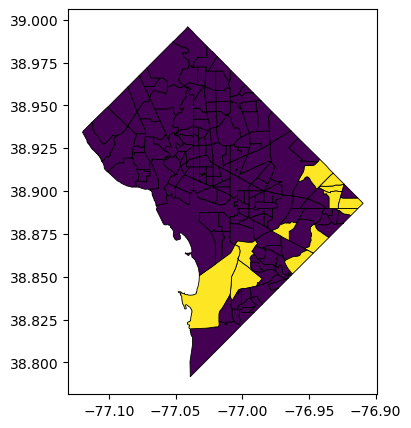

In [98]:
dc_all_1and10_shape.plot(
    figsize=(5,5),
    column="lilatracts_1and10",
    cmap='viridis',
    edgecolor='black', 
    linewidth = 0.6,
);

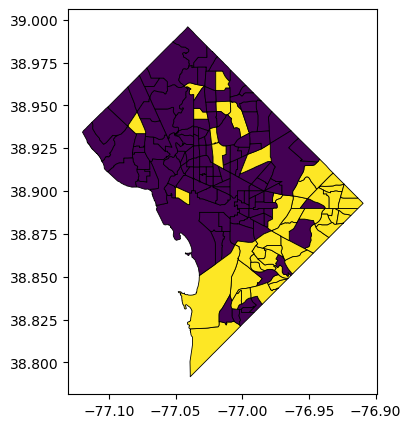

In [99]:
dc_all_halfand10_shape.plot(
    figsize=(5,5),
    column="lilatracts_halfand10",
    cmap='viridis',
    edgecolor='black', 
    linewidth = 0.6,
);